# Binomal Tree

In [85]:
pip install yfinance 

In [86]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os

In [87]:
initial_data = yf.download("MSFT", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [88]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,165.309998,172.919998,162.309998,172.789993,171.051773,71030800
2020-03-03,173.800003,175.000000,162.259995,164.509995,162.855057,71677000
2020-03-04,168.490005,170.699997,165.619995,170.550003,168.834290,49814400
2020-03-05,166.050003,170.869995,165.690002,166.270004,164.597351,47817300
2020-03-06,162.610001,163.110001,156.000000,161.570007,159.944641,72821100


In [89]:
initial_data['Adj Close'].head()

Date
2020-03-02    171.051773
2020-03-03    162.855057
2020-03-04    168.834290
2020-03-05    164.597351
2020-03-06    159.944641
Name: Adj Close, dtype: float64

In [108]:
data = initial_data['Adj Close']

In [111]:
data.head()

Date
2020-03-02    171.051773
2020-03-03    162.855057
2020-03-04    168.834290
2020-03-05    164.597351
2020-03-06    159.944641
Name: Adj Close, dtype: float64

In [114]:
data.tail()

Date
2021-02-22    234.509995
2021-02-23    233.270004
2021-02-24    234.550003
2021-02-25    228.990005
2021-02-26    232.380005
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

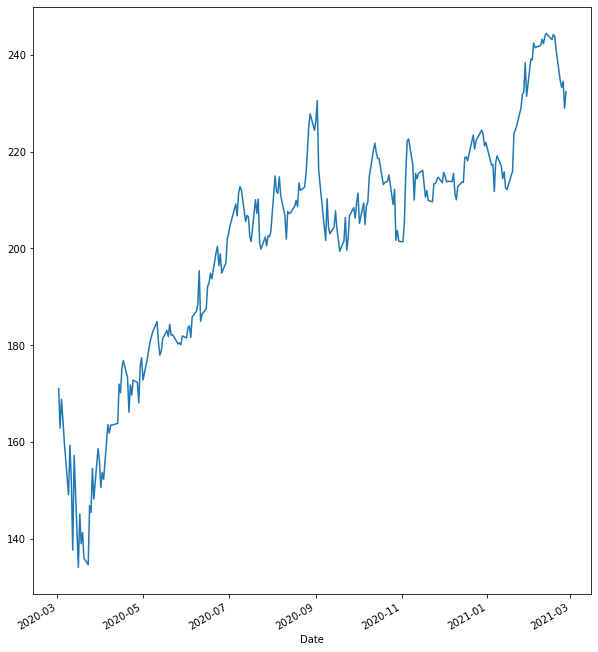

In [115]:
data.plot(figsize=(10, 12), subplots=True)

In [112]:
data.describe().round(2)

count    251.00
mean     201.16
std       24.67
min      134.06
25%      183.30
50%      207.66
75%      215.50
max      244.43
Name: Adj Close, dtype: float64

In [113]:
data.diff().head()

Date
2020-03-02         NaN
2020-03-03   -8.196716
2020-03-04    5.979233
2020-03-05   -4.236938
2020-03-06   -4.652710
Name: Adj Close, dtype: float64

In [100]:
initial_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,165.309998,172.919998,162.309998,172.789993,171.051773,71030800
2020-03-03,173.800003,175.000000,162.259995,164.509995,162.855057,71677000
2020-03-04,168.490005,170.699997,165.619995,170.550003,168.834290,49814400
2020-03-05,166.050003,170.869995,165.690002,166.270004,164.597351,47817300
2020-03-06,162.610001,163.110001,156.000000,161.570007,159.944641,72821100
...,...,...,...,...,...,...
2021-02-22,237.419998,237.929993,232.399994,234.509995,234.509995,36446900
2021-02-23,230.330002,234.830002,228.729996,233.270004,233.270004,30228700
2021-02-24,230.009995,235.199997,229.000000,234.550003,234.550003,26339700


In [119]:
S = initial_data['Adj Close'][-1]
print('The spot price is ', round(S,2), '.')

The spot price is  232.38 .


In [104]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 42.92 %


In [ ]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1))
vol_h = np.sqrt(126) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

In [120]:
S = initial_data['Adj Close'][-1]  # spot stock price
K = 240.0                           # strike
T = 1/52                            # maturity 
r = 0.0167                          # risk free rate 
sig = 0.4292                        # diffusion coefficient or volatility
N = 4                               # number of periods or number of time steps  
payoff = "put"                      # payoff

In [121]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [122]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [123]:
S

array([[232.38000488, 239.39948677, 246.63100551, 254.08096609,
        261.75596695],
       [  0.        , 225.56634268, 232.38000488, 239.39948677,
        246.63100551],
       [  0.        ,   0.        , 218.95246527, 225.56634268,
        232.38000488],
       [  0.        ,   0.        ,   0.        , 212.53251474,
        218.95246527],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        206.3008049 ]])

In [124]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.49390943535839255

In [125]:
S_T = S[:,-1]
S_T

array([261.75596695, 246.63100551, 232.38000488, 218.95246527,
       206.3008049 ])

In [126]:
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  7.61999512],
       [ 0.        ,  0.        ,  0.        ,  0.        , 21.04753473],
       [ 0.        ,  0.        ,  0.        ,  0.        , 33.6991951 ]])

In [127]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[10.45406189,  5.61878429,  1.95137814,  0.        ,  0.        ],
       [ 0.        , 15.1746174 ,  9.19881081,  3.85609802,  0.        ],
       [ 0.        ,  0.        , 21.00899936, 14.41438886,  7.61999512],
       [ 0.        ,  0.        ,  0.        , 27.44821681, 21.04753473],
       [ 0.        ,  0.        ,  0.        ,  0.        , 33.6991951 ]])

In [129]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 1.0


# Monte Carlo Simulation

In [131]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [132]:
T = 1/52
r = 0.0167
sigma = 0.4292
S0 = initial_data['Adj Close'][-1]
K = 240        

In [133]:
S = mcs_simulation_np(1000)

In [134]:
S = np.transpose(S)
S

array([[232.38000488, 232.8645619 , 233.10790244, ..., 228.41352564,
        228.19765753, 227.90003541],
       [232.38000488, 231.94758727, 232.5616856 , ..., 242.22396643,
        242.66395286, 242.0680712 ],
       [232.38000488, 232.18824794, 232.42596957, ..., 218.08738643,
        217.8168156 , 217.16387989],
       ...,
       [232.38000488, 233.53590857, 233.9259031 , ..., 230.06957132,
        229.73325504, 229.78074847],
       [232.38000488, 231.98811401, 231.95988055, ..., 232.27597901,
        232.37321969, 231.83950945],
       [232.38000488, 231.79559861, 231.59723831, ..., 258.16817065,
        258.03587551, 258.61624369]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

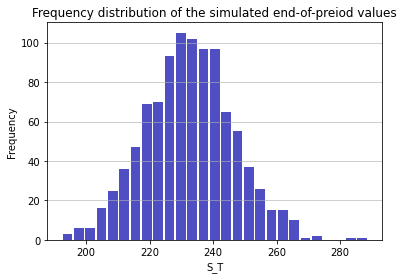

In [135]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [136]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.3776223776223776


# Greeks

## Option Value

In [138]:
def binary_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.pdf(-d2, 0.0, 1.0)
    
    return option_value

In [142]:
binary_option_bsm(231, 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

0.0

In [143]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
        Put [i] = binary_option_bsm(231, 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

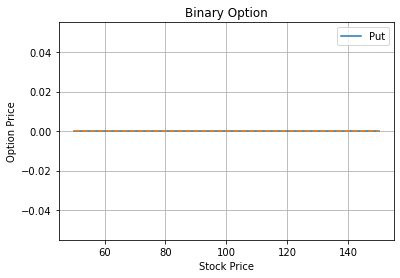

In [144]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Binary Option')
plt.legend(['Put'])

### Delta

In [145]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (vol * S * np.sqrt(T))
    elif payoff == "put":
        delta =  - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return delta

In [146]:
delta(231, 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

-0.0231814235708056

In [148]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

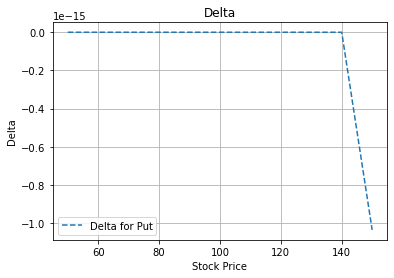

In [150]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

### Gamma

In [156]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ((vol**2) * (S**2) * np.sqrt(T))
    
    return gamma

In [157]:
gamma(231, 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

-0.00014264424976108436

In [158]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

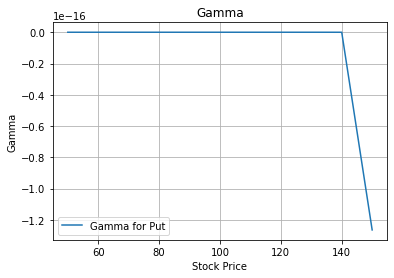

In [159]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

### Speed

In [168]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / ((vol**2) * (S**3) * np.sqrt(T)) * ((-2 * (d1)) + (1 - (d1) * (d2) / vol * np.sqrt(T)))
    
    return speed

In [169]:
speed(231, 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

2.1135955709601447e-06

In [170]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

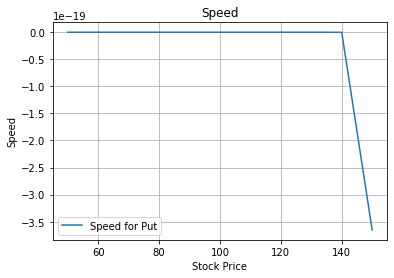

In [171]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

### Vega

In [174]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = np.exp(-r * T) * si.norm.pdf((d2) * (d1 / vol))  
    
    return vega

In [175]:
vega(231, 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

0.25354598616213436

In [176]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(231, 240, 1/52, 0.0167, 0.0095, 0.4292, 'put')

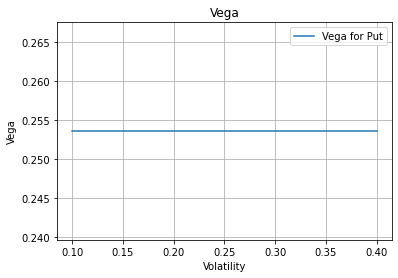

In [177]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])